In [11]:
import pandas as pd, matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
import os
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/卒論/STS_COVID")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "本論文、参考文献それぞれのジャーナルが入ったデータフレームへのパス"

#簡単のためjournal_nameとref_journalだけにする
df = pd.read_json(path, orient="records")[["journal_name","ref_journal"]]

#参考文献のジャーナル名を略記に
df.loc[df['ref_journal'] == 'Social studies of science', 'ref_journal'] = 'SSS'

df.loc[df['ref_journal'] == 'Science, technology & human values/Science, technology, & human values', 'ref_journal'] = 'STHV'

df.loc[df['ref_journal'] == 'Public understanding of science', 'ref_journal'] = 'PUS'

df.loc[df['ref_journal'] == 'Science as culture', 'ref_journal'] = 'SasC'

df.loc[df['ref_journal'] == 'Research policy', 'ref_journal'] = 'RePoli'

df.loc[df['ref_journal'] == 'Science, technology & society', 'ref_journal'] = 'STS'

df.loc[df['ref_journal'] == 'Research evaluation', 'ref_journal'] = 'ReEval'

df.loc[df['ref_journal'] == 'East Asian science, technology and society', 'ref_journal'] = 'EASTS'

df.loc[df['ref_journal'] == 'Science communication', 'ref_journal'] = 'SciCom'

df.loc[df['ref_journal'] == 'Journal of responsible innovation', 'ref_journal'] = 'JRI'

df.loc[df['ref_journal'] == 'Technology in society', 'ref_journal'] = 'TIS'

df.loc[df['ref_journal'] == 'Science and public policy/Science & public policy', 'ref_journal'] = 'SPP'

df.loc[df['ref_journal'] ==  'JCOM, journal of science communication', 'ref_journal'] = 'JCOM'


# データの概観

In [12]:
#本論文のジャーナル構成
df["journal_name"].value_counts()

journal_name
TIS               17511
Scientometrics    16413
RePoli            13391
Technovation      13139
SPP                3992
PUS                2664
SSS                2369
STHV               2346
ReEval             2232
Minerva            1354
JRI                1343
SasC               1098
STS                1057
SciCom              813
EASTS               645
JCOM                111
Name: count, dtype: int64

In [13]:
df['ref_journal'].value_counts()

ref_journal
RePoli                                                                                   3822
Scientometrics                                                                           2958
Strategic management journal                                                             1294
Technological forecasting & social change/Technological forecasting and social change    1094
TIS                                                                                      1047
                                                                                         ... 
Dialogo                                                                                     1
Selected papers of internet research                                                        1
SpringerBriefs in well-being and quality of life research                                   1
Studies in graduate and postdoctoral education                                              1
The  journal of language and linguistic studie

# 自分のジャーナル/STSジャーナル/その他のジャーナルの割合を求める

In [5]:
#同じジャーナル内のRefernece
same_count = df.groupby("journal_name").apply(lambda x: (x["journal_name"] == x["ref_journal"]).sum()).reset_index(name="same")
#STSジャーナル内のRefernece
same_group_count = df.groupby("journal_name").apply(lambda x: x["ref_journal"].isin(df["journal_name"].unique().tolist()).sum()).reset_index(name="same_group")
#STSジャーナル外のRefernece
other_count = df.groupby("journal_name").apply(lambda x: (~(x["journal_name"] == x["ref_journal"]) & ~x["ref_journal"].isin(df["journal_name"].unique().tolist())).sum()).reset_index(name="other")
new_df = pd.merge(same_count, same_group_count, on="journal_name")
new_df = pd.merge(new_df, other_count, on="journal_name")
# 各行の総和を示す列を追加
new_df["total"] = new_df.iloc[:, 1:].sum(axis=1)
print(new_df)

In [ ]:
# パーセントのデータフレームを作成
percent_df = new_df.copy()
percent_df.iloc[:, 1:-1] = (percent_df.iloc[:, 1:-1].div(percent_df["total"], axis=0) * 100).round(2)

print(percent_df)

TypeError: can only concatenate str (not "int") to str

# 積み上げ棒グラフ

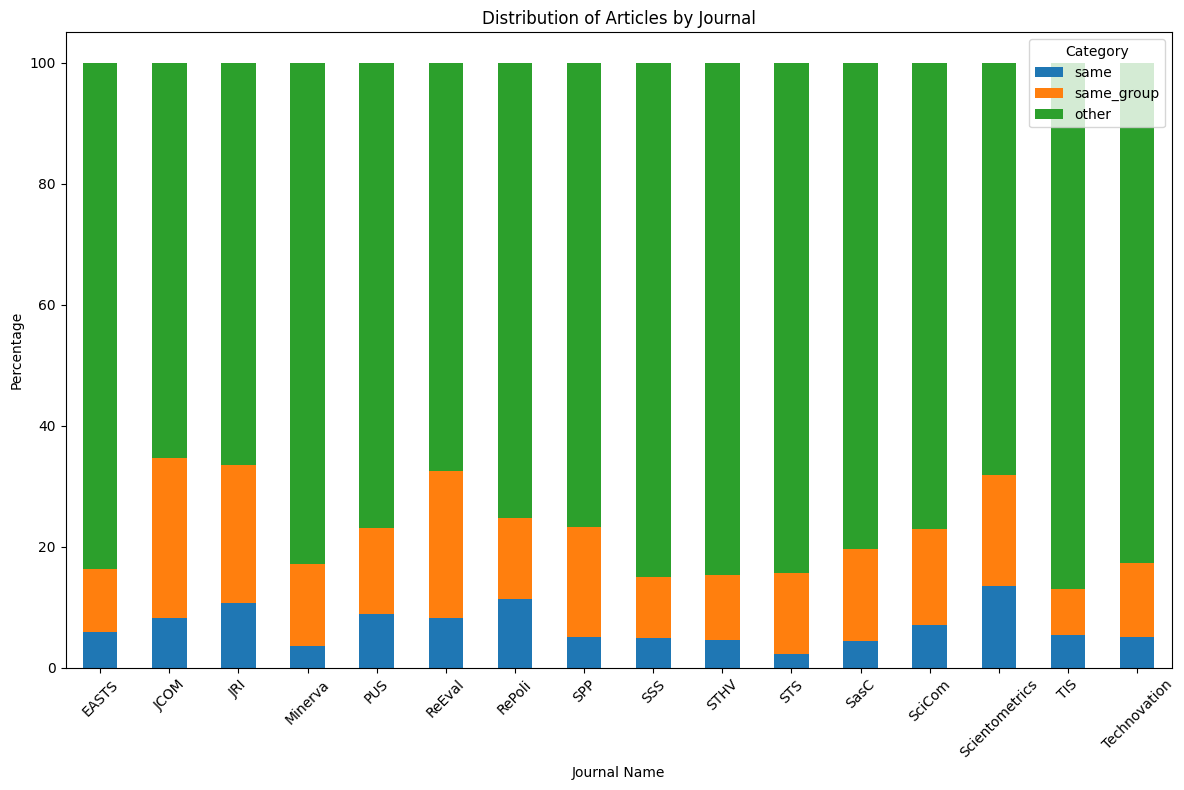

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

# 積み上げ棒グラフを作成
percent_df.plot(kind='bar', x='journal_name', y=['same', 'same_group', 'other'], stacked=True, ax=ax)

# ラベルとタイトルを設定
ax.set_xlabel('Journal Name')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Articles by Journal')
plt.xticks(rotation=45)
plt.legend(title='Category')

# グラフを表示
plt.tight_layout()
plt.show()